###1. PERKENALAN

In [ ]:
'''

Saya Rugaya Muksin BSA, biasa dipanggil Ega. Saya Student Bootcamp Data Science Batch 006 Hacktiv8.

Berdasarkan Guidelines tugas, saya menggunakan dataset pokemon. Dimana dalam dataset tersebut terdapat 721 pokemon dan berisi beberapa informasi
seperti Nama, Type, Generasi, dll.

Saya akan mengolah dataset pokemon ini untuk menampilkan informasi NAMA, SPESIAL ATTACK, SPESIAL DEFENSI, dan GENERASI pokemon type Electric
yang saya kategorikan
sebagai 'JAGOAN' dengan kriteria: 

*Nilai kekuatan lebih dari 500 (diambil dari kolom Total)
*Nilai kecepatan lebih dari 100, artinya pokemon menyerang lebih cepat dalam setiap putaran (diambil dari kolom Speed)
*Nilai penyerengan lebih dari 80, artinya damage yang diberikan saat penyerangan cukup besar (diambil dari kolom Attack)
*Nilai Legendary = True.

Menurut saya informasi ini sangat berguna ketika kita membutuhkan sebuah pokemon type Electric yang memiliki kekuatan yang besar, unggul karena menyerang
lebih cepat dalam setiap putaran, dan kerusakan yang diberikan cukup besar.

'''

###2. IMPORT PUSTAKA YANG DIBUTUHKAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###3. DATA LOADING

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!mkdir ./kaggle
!mv ./kaggle.json ./kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json #akses dengan rootnya
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d abcsds/pokemon

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 13.3MB/s]


In [ ]:
!mkdir pokemon
!unzip pokemon.zip -d pokemon

Archive:  pokemon.zip
  inflating: pokemon/Pokemon.csv     


In [ ]:
df = pd.read_csv ('./pokemon/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


###4. DATA CLEANING

In [ ]:
pokemon = df.copy()

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


####4.1 Mengatasi Missing Value

Remove all the rows and columns with missing values

In [ ]:
rows_without_missing_data = pokemon.dropna()

In [ ]:
rows_without_missing_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
pkmndata_without_missing_column = pokemon.dropna(axis=1)

In [ ]:
pkmndata_without_missing_column

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


In [ ]:
pokemon_data = pkmndata_without_missing_column

####4.2 Manipulating Columns

Rename Type 1 as Type

In [ ]:
pokemon_data

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


In [ ]:
renamed_pokemon_data = pokemon_data.rename(
    columns = {'Type 1' : 'Type'}
)

renamed_pokemon_data.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [ ]:
data_pokemon = renamed_pokemon_data

###5. EKPLORASI DATA

####5.1 Querying Pokemon Dataset

These are 5 Querying:

1. The type of Pokemon is just for 'Electric'
2. Total column values should more then 500
3. Speed column values should more then 100
4. Attack column values should more then 80
5. Legendary column values should be 'True'

In [ ]:
data_pokemon[
             (data_pokemon['Type'] == 'Electric') &
             (data_pokemon['Total'] > 500) &
             (data_pokemon['Speed'] > 100) &
             (data_pokemon['Attack'] > 80) &
             (data_pokemon['Legendary'] == True)
]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
262,243,Raikou,Electric,580,90,85,75,115,100,115,2,True
704,642,ThundurusIncarnate Forme,Electric,580,79,115,70,125,80,111,5,True
705,642,ThundurusTherian Forme,Electric,580,79,105,70,145,80,101,5,True


####5.2 Grouping and Aggregating

I made a group with 4 data, they are: Name, Sp. Atk, Sp. Def, Generation

This group will give information about Pokemon Type 'Electric' with a really good quality (JAGOAN)

In [ ]:
data_pokemon[
    (data_pokemon['Type'] == 'Electric') &
    (data_pokemon['Total'] > 500) &
    (data_pokemon['Speed'] > 100) &
    (data_pokemon['Attack'] > 80) &
    (data_pokemon['Legendary'] == True)
].groupby(['Name', 'Sp. Atk', 'Sp. Def', 'Generation'])['#'].count()

Name                      Sp. Atk  Sp. Def  Generation
Raikou                    115      100      2             1
ThundurusIncarnate Forme  125      80       5             1
ThundurusTherian Forme    145      80       5             1
Name: #, dtype: int64

####5.3 Visualization Data

I just visualize data pokemon type electric with total values, speed values, and attack values. 

In [ ]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


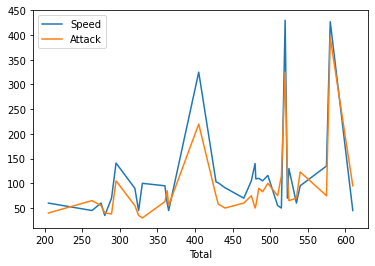

In [ ]:
data_pokemon[data_pokemon['Type'] == 'Electric'].groupby('Total')['Speed', 'Attack'].sum().plot()

In [ ]:
data_pokemon[data_pokemon['Type'] == 'Electric'].groupby('Total')['Speed', 'Attack'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Speed,Attack
Total,,
205,60,40
263,45,65
275,60,55
280,35,40
289,70,38
295,141,105
320,90,55
325,45,35
330,100,30


Visualize pokemon type with the total number of pokemon type

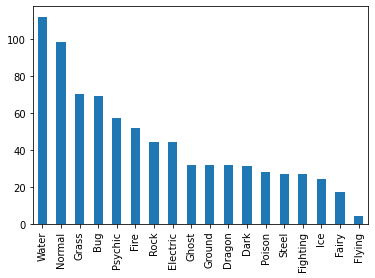

In [ ]:
data_pokemon['Type'].value_counts().head(18).plot(kind = 'bar')

In [ ]:
data_pokemon['Type'].value_counts().head(18)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type, dtype: int64

###6. KESIMPULAN

In [ ]:
'''
Dari dataset pokemon yang telah diolah, terdapat 3 pokemon type Electric kategori JAGOAN, dengan Informasi:

Name                      Sp. Atk  Sp. Def  Generation
Raikou                    115      100      2             
ThundurusIncarnate Forme  125      80       5             
ThundurusTherian Forme    145      80       5             

Ketiga Pokemon type Electric ini dikategorikan JAGOAN karena memiliki kekuatan yang besar, unggul karena menyerang lebih cepat dalam setiap putaran, 
dan kerusakan yang diberikan cukup besar.

'''